In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree
import matplotlib.pyplot as plt

import numpy as np

/Users/user/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Решающие деревья

### Базовая модель

Будем решать задачу многоклассовой классификации с 3 классами

In [3]:
# Создадим датасет из 2 признаков
classification_problem = datasets.make_classification(n_features=2, n_informative=2,
                                                      n_classes=3, n_redundant=0,
                                                      n_clusters_per_class=1, random_state=3)

In [4]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

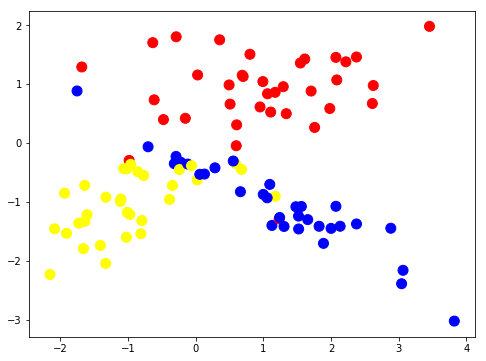

In [5]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)

In [6]:
# Разобьём данные на обучение и тест
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0],
                                                                                     classification_problem[1],
                                                                                     test_size=0.3,
                                                                                     random_state=1)

In [7]:
# Построение базовой модели
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [8]:
# Делаем предсказание на тестовую выборку
predictions = clf.predict(test_data)

# Качество модели классификации
metrics.accuracy_score(test_labels, predictions)

0.76666666666666672

# Подкручиваем параметры

### Разделяющая поверхность

In [9]:
# Принимаются: шаг, границы
# Эта функция создаёт объект для отрисовки разделяющей плоскости

def get_meshgrid(data, step=.05, border=5.):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [14]:
"""
Принимает на вход:
модель,
обучающая и тестовая выборки (данные метки),
colormap для отрисовки объектов в плоскости признаков,
colormap для отрисовки разделяющей поверхности
"""

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, colors=colors, light_colors=light_colors):
    
    # fit model
    estimator.fit(train_data, train_labels)
    
    plt.figure(figsize=(16, 6))
    
    #plot decision surface on the train data
    plt.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    # Представим, что каждая точка - объект, подлежащий классификации --> получим набор меток в качестве
    # цветов для построения разделяющей плоскости
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    # Отрисуем разделяющую плоскость: подаем точки, предсказания для отрисовки объектов разными цветами и сами цвета
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s=100, cmap=colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s=100, cmap=colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

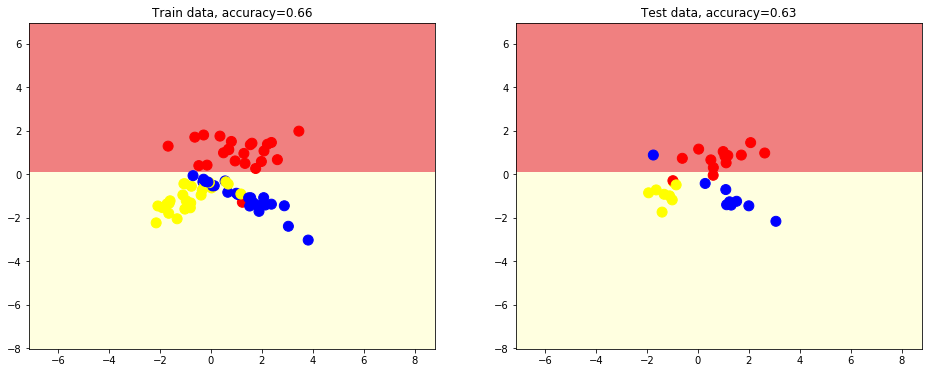

In [16]:
# Применим функцию
estimator = tree.DecisionTreeClassifier(random_state=1, max_depth=1)

"""ДЕРЕВО ГЛУБИНЫ 1"""
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

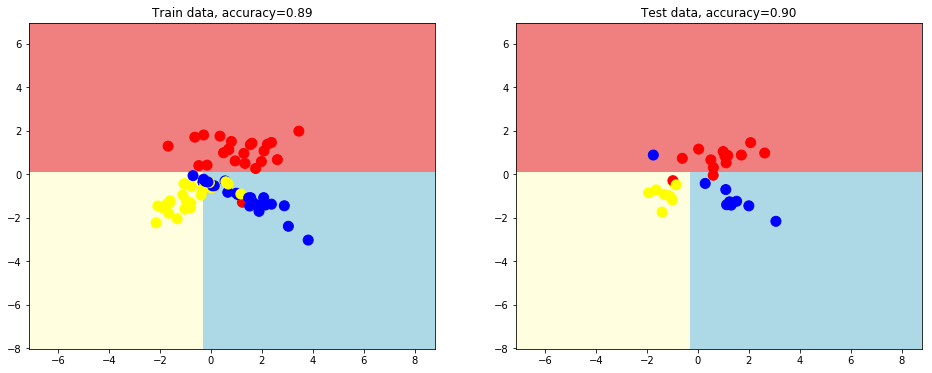

In [17]:
# Применим функцию
estimator = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

"""ДЕРЕВО ГЛУБИНЫ 2"""
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

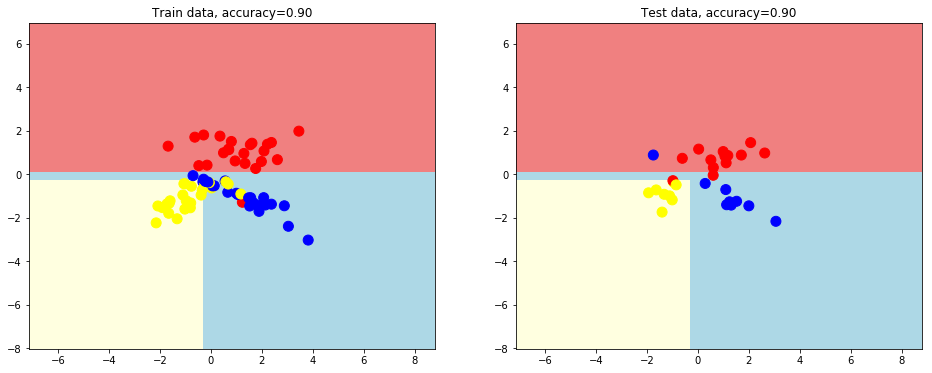

In [18]:
# Применим функцию
estimator = tree.DecisionTreeClassifier(random_state=1, max_depth=3)

"""ДЕРЕВО ГЛУБИНЫ 3"""
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

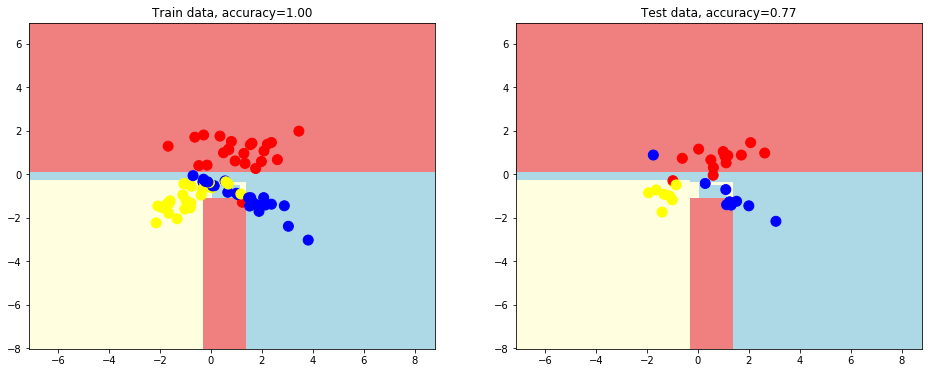

In [20]:
# Применим функцию
estimator = tree.DecisionTreeClassifier(random_state=1)
"""ДЕРЕВО БЕЗ ЗАДАННОЙ ИЗНАЧАЛЬНО ГЛУБИНЫ (глубина выбирается автоматически)"""
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

# Фактически произошло переобучение

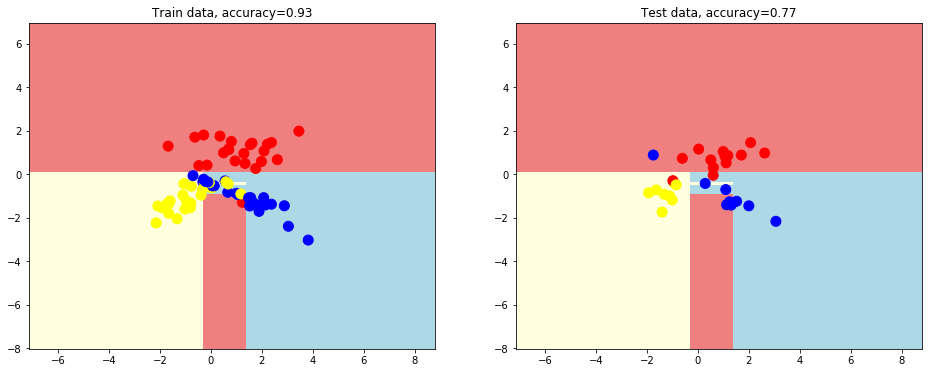

In [24]:
# Ограничим количество объектов, которое необходимо для продолжения ветвления из вершины
# Пусть минимальное количество объектов в листе = 3 (min_samples_leaf=3)

plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=3), train_data, train_labels, 
                      test_data, test_labels)